In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('amazon_quarter.csv')
df.tail()

,Quarter_Date,Amazon_Revenue(Millions$US)
59,2006-03-31,2279
60,2005-12-31,2977
61,2005-09-30,1858
62,2005-06-30,1753
63,2005-03-31,1902


In [3]:
company_quarter= df.rename(columns={"Quarter_Date": 'ds', 
                                 "Amazon_Revenue(Millions$US)": 'y'})
company_quarter

,ds,y
0,2020-12-31,125555
1,2020-09-30,96145
2,2020-06-30,88912
3,2020-03-31,75452
4,2019-12-31,87437
...,...,...
59,2006-03-31,2279
60,2005-12-31,2977
61,2005-09-30,1858
62,2005-06-30,1753


In [4]:
model = Prophet()
model.fit(company_quarter)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [5]:
future = model.make_future_dataframe(periods=8, freq='Q')
future.tail()

,ds
67,2021-12-31
68,2022-03-31
69,2022-06-30
70,2022-09-30
71,2022-12-31


In [6]:
forecast = model.predict(future)

In [7]:

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(20)

,ds,yhat,yhat_lower,yhat_upper
52,2018-03-31,51975.296964,47474.170942,56410.049968
53,2018-06-30,54518.492550,50179.266092,59017.106563
54,2018-09-30,59172.651044,54935.687175,63903.212939
55,2018-12-31,69322.689335,65301.924140,73889.348667
56,2019-03-31,66062.146788,61344.870823,70454.167026
57,2019-06-30,69409.485822,64705.325601,73907.424733
58,2019-09-30,73858.660130,69494.190008,78540.220437
59,2019-12-31,85300.266954,80947.424936,89827.117729
60,2020-03-31,82631.402513,78293.947129,86723.102199
61,2020-06-30,88347.969217,83902.238138,93067.138404


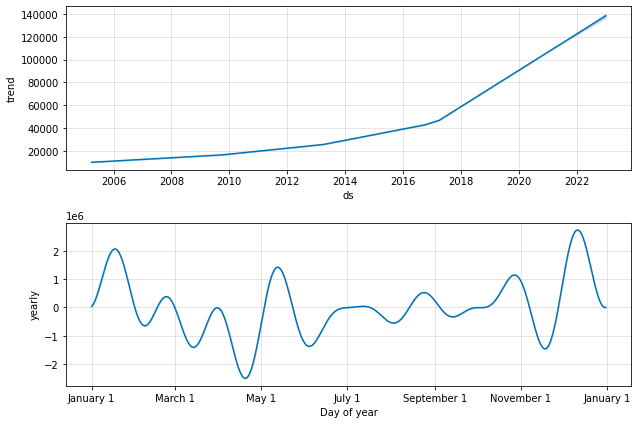

In [8]:

plot2 = model.plot_components(forecast)

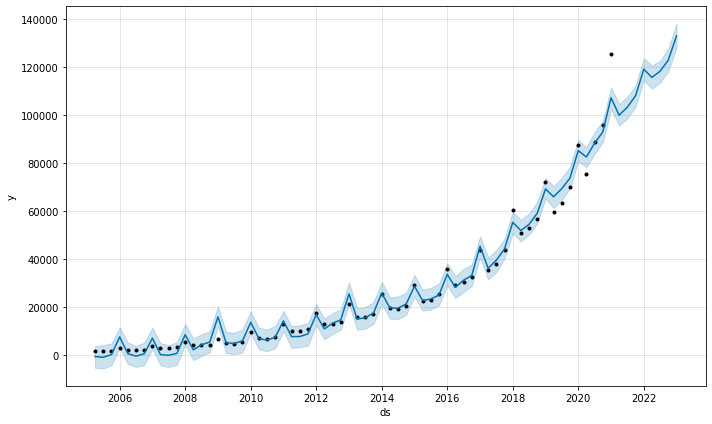

In [9]:

plot1 = model.plot(forecast)